# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

# Importando bibliotecas e carregando os dados.


In [41]:
import pandas as pd 
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler , Normalizer


In [54]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### Modelo de regressão de tip explicado por net_bill

In [68]:
model = smf.ols('tip ~net_bill',data = tips).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           5.02e-23
Time:                        20:20:10   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Padronizando as variaveis 

In [62]:
standard = StandardScaler()

In [63]:
tips['netbill_standard'] = standard.fit_transform(tips['net_bill'].to_frame())
tips['tip_pct_standard'] = standard.fit_transform(tips['tip_pct'].to_frame())
tips.describe()

,total_bill,tip,size,tip_pct,net_bill,netbill_standard,tip_pct_standard
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,2.440000e+02
mean,19.785943,2.998279,2.569672,0.202123,16.787664,-1.614146e-16,-2.428613e-17
std,8.902412,1.383638,0.951100,0.163385,8.032459,1.002056e+00,1.002056e+00
min,3.070000,1.000000,1.000000,0.036955,2.070000,-1.836040e+00,-1.012995e+00
25%,13.347500,2.000000,2.000000,0.148274,11.000000,-7.220156e-01,-3.302650e-01
50%,17.795000,2.900000,2.000000,0.183110,14.555000,-2.785266e-01,-1.166121e-01
75%,24.127500,3.562500,3.000000,0.236821,20.685000,4.861957e-01,2.128053e-01
max,50.810000,10.000000,6.000000,2.452381,43.170000,3.291217e+00,1.380106e+01


### Gráfico de dispersão entre tip e net_bill

(0.0, 45.328500000000005)

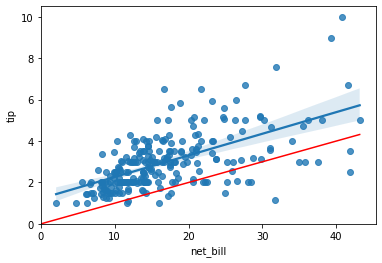

In [64]:
ax = sns.regplot(y='tip' , x = 'net_bill',data = tips[tips['tip_pct']<.5])
x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y ,'-r' , label = 'Linha dos 10%')
plt.ylim(bottom = 0)
plt.xlim(left = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

### Gráfico de dispersão entre tip_pct por net_bill

(0.0, 45.328500000000005)

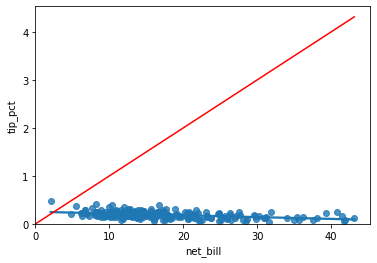

In [61]:
ax = sns.regplot(y='tip_pct' , x = 'net_bill',data = tips[tips['tip_pct']<.5])
x = np.linspace(0, tips['net_bill'].max(),100)
y = .1*x

plt.plot(x, y ,'-r' , label = 'Linha dos 10%')
plt.ylim(bottom = 0)
plt.xlim(left = 0)

### Testando o modelo com o StandardScaler

In [74]:
reg_standard = smf.ols('tip_pct_standard ~ netbill_standard', data = tips).fit()

In [75]:
reg_standard.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       tip_pct_standard   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.52e-06
Time:                        20:31:26   Log-Likelihood:                -334.54
No. Observations:                 244   AIC:                             673.1
Df Residuals:                     242   BIC:                             680.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.898e-17      0.061  -9.63e-16      1.000      -0.121       0.121
netbill_standard    -0.3021      0.061     -4.931      0.000      -0.423      -0.181
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testando modelo sem  o StandardScaler

In [71]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           1.52e-06
Time:                        20:30:59   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?


Podemos comparar os $R^2$s , e afirmar que tip_pct não é muito bem explicado pela variavel net_bill. Contudo a mesma explica 33,3% da variavel tip.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

### 1. Obtendo valor predito para tip_pct.

In [76]:
tips['tip_pct_pred'] = reg.fittedvalues
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,netbill_standard,tip_pct_standard,tip_pct_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.100757,-0.852008,0.030443
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-1.011437,-0.066724,0.305600
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.090112,-0.013724,-0.027227
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.446899,-0.243053,-0.135028
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.522997,-0.184330,-0.158020


### 2. Obtendo o valor predito de tip com tip_pct_pred * net_bill

In [79]:
tips['tip_pred'] = tips['tip_pct_pred'] * tips['net_bill']

In [80]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,netbill_standard,tip_pct_standard,tip_pct_pred,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,-0.100757,-0.852008,0.030443,0.486479
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,-1.011437,-0.066724,0.305600,2.652604
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.090112,-0.013724,-0.027227,-0.476741
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.446899,-0.243053,-0.135028,-2.750517
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.522997,-0.184330,-0.158020,-3.315267


### 3. Calculando o $R^2$ do modelo para ```tip```

In [81]:
r = tips[['tip_pred' , 'tip']].corr().iloc[0,1]
r**2

0.26581223192936937

### O $R^2$ do modelo do item 1 é maior do que o modelo reg